# Torre Climatológica (MS)

In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Load file

In [3]:
torre_ms = '../../database/torrePozoIzquierdo_JUL_AGO_2004/torreMS.txt'

In [6]:
parse = lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M:%S')
df_torre_ms = pd.read_csv('../../database/torrePozoIzquierdo_JUL_AGO_2004/torreMS.txt', 
                          skiprows=17,  
                          delim_whitespace=True, 
                          header=None,
                          names=['measure_date', 
                                 'measure_time', 
                                 'humedad_relativa',
                                 'irradiancia_difusa_horizontal',
                                 'irradiancia_global_horizontal', 
                                 'temperatura_ambiente',
                                 'irradiancia_ultravioleta',
                                  'presion_barometrica',
                                  'pluviometria'],
                         parse_dates=[['measure_date', 'measure_time']], 
                         date_parser=parse,
                         index_col=0)

In [7]:
df_torre_ms.head(5)

,humedad_relativa,irradiancia_difusa_horizontal,irradiancia_global_horizontal,temperatura_ambiente,irradiancia_ultravioleta,presion_barometrica,pluviometria
measure_date_measure_time,,,,,,,
2004-07-01 00:02:00,91.9,0.0,0.0,22.2,0.0,1016.9,0.0
2004-07-01 00:03:00,91.9,0.0,0.0,22.2,0.0,1016.9,0.0
2004-07-01 00:04:00,91.9,0.0,0.0,22.2,0.0,1016.9,0.0
2004-07-01 00:05:00,91.9,0.0,0.0,22.2,0.0,1016.9,0.0
2004-07-01 00:06:00,91.9,0.0,0.0,22.2,0.0,1016.9,0.0


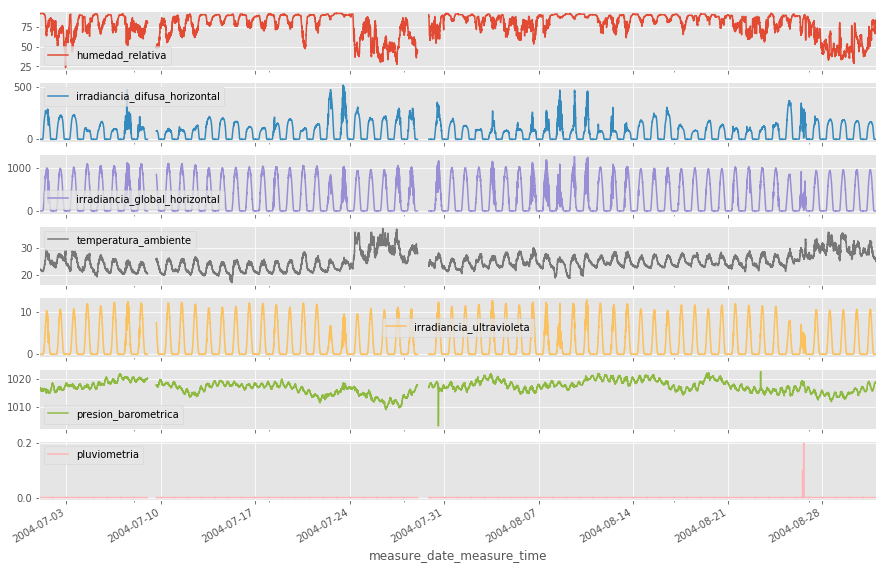

In [9]:
df_torre_ms.plot(subplots=True, figsize=(15,10));

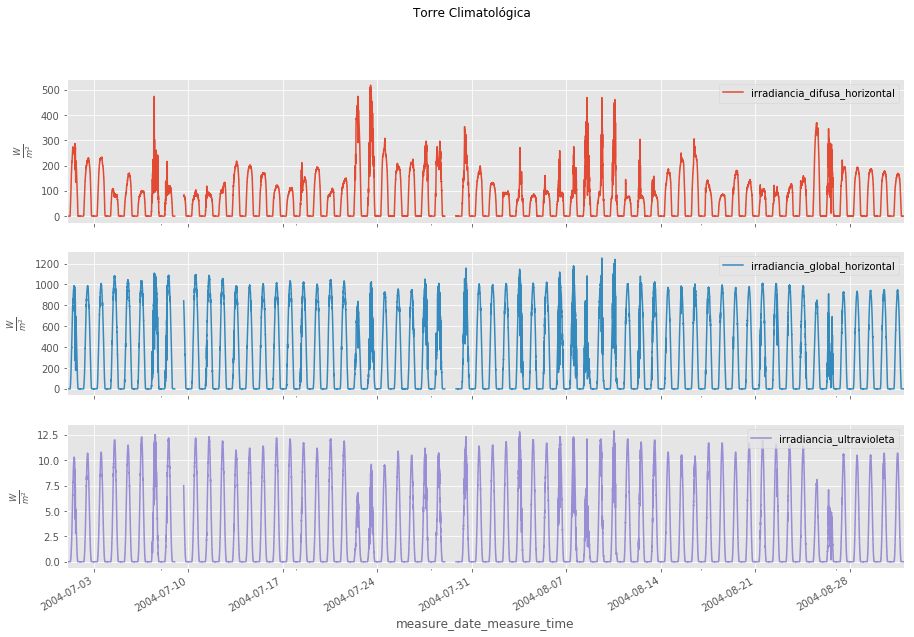

In [17]:
axes = df_torre_ms[['irradiancia_difusa_horizontal', 'irradiancia_global_horizontal',
                   'irradiancia_ultravioleta']].plot(subplots=True, 
                                                     figsize=(15,10),
                                                     title='Torre Climatológica');
axes[0].set_ylabel(r'$\frac{W}{m^2}$');
axes[1].set_ylabel(r'$\frac{W}{m^2}$');
axes[2].set_ylabel(r'$\frac{W}{m^2}$');

In [24]:
df_pv = df_torre_ms[['irradiancia_difusa_horizontal', 'irradiancia_global_horizontal',
                   'irradiancia_ultravioleta']]

## Nan values 

In [26]:
true_index = pd.date_range(df_torre_ms.index.min(), df_torre_ms.index.max(), freq='1min')
df_true = pd.DataFrame(index=true_index)
df_true.head()

""
2004-07-01 00:02:00
2004-07-01 00:03:00
2004-07-01 00:04:00
2004-07-01 00:05:00
2004-07-01 00:06:00


In [27]:
df_join = pd.concat([df_true, df_pv], axis=1, join='outer')

In [34]:
df_nan = df_join[df_join.isnull().any(axis=1)]
df_nan

,irradiancia_difusa_horizontal,irradiancia_global_horizontal,irradiancia_ultravioleta
2004-07-02 00:00:00,NaN,NaN,NaN
2004-07-03 00:00:00,NaN,NaN,NaN
2004-07-04 00:00:00,NaN,NaN,NaN
2004-07-05 00:00:00,NaN,NaN,NaN
2004-07-06 00:00:00,NaN,NaN,NaN
2004-07-07 00:00:00,NaN,NaN,NaN
2004-07-08 00:00:00,NaN,NaN,NaN
2004-07-09 00:00:00,NaN,NaN,NaN
2004-07-09 00:01:00,NaN,NaN,NaN
2004-07-09 00:02:00,NaN,NaN,NaN


In [33]:
print('Número de medidas nulas: {0}'.format(df_true.shape[0] - df_pv.shape[0]))

Número de medidas nulas: 2158


In [31]:
df_pv.shape

(87119, 3)

In [36]:
for i in df_nan.index:
    print(i)

2004-07-02 00:00:00
2004-07-03 00:00:00
2004-07-04 00:00:00
2004-07-05 00:00:00
2004-07-06 00:00:00
2004-07-07 00:00:00
2004-07-08 00:00:00
2004-07-09 00:00:00
2004-07-09 00:01:00
2004-07-09 00:02:00
2004-07-09 00:03:00
2004-07-09 00:04:00
2004-07-09 00:05:00
2004-07-09 00:06:00
2004-07-09 00:07:00
2004-07-09 00:08:00
2004-07-09 00:09:00
2004-07-09 00:10:00
2004-07-09 00:11:00
2004-07-09 00:12:00
2004-07-09 00:13:00
2004-07-09 00:14:00
2004-07-09 00:15:00
2004-07-09 00:16:00
2004-07-09 00:17:00
2004-07-09 00:18:00
2004-07-09 00:19:00
2004-07-09 00:20:00
2004-07-09 00:21:00
2004-07-09 00:22:00
2004-07-09 00:23:00
2004-07-09 00:24:00
2004-07-09 00:25:00
2004-07-09 00:26:00
2004-07-09 00:27:00
2004-07-09 00:28:00
2004-07-09 00:29:00
2004-07-09 00:30:00
2004-07-09 00:31:00
2004-07-09 00:32:00
2004-07-09 00:33:00
2004-07-09 00:34:00
2004-07-09 00:35:00
2004-07-09 00:36:00
2004-07-09 00:37:00
2004-07-09 00:38:00
2004-07-09 00:39:00
2004-07-09 00:40:00
2004-07-09 00:41:00
2004-07-09 00:42:00


2004-07-29 10:47:00
2004-07-29 10:48:00
2004-07-29 10:49:00
2004-07-29 10:50:00
2004-07-29 10:51:00
2004-07-29 10:52:00
2004-07-29 10:53:00
2004-07-29 10:54:00
2004-07-29 10:55:00
2004-07-29 10:56:00
2004-07-29 10:57:00
2004-07-29 10:58:00
2004-07-29 10:59:00
2004-07-29 11:00:00
2004-07-29 11:01:00
2004-07-29 11:02:00
2004-07-29 11:03:00
2004-07-29 11:04:00
2004-07-29 11:05:00
2004-07-29 11:06:00
2004-07-29 11:07:00
2004-07-29 11:08:00
2004-07-29 11:09:00
2004-07-29 11:10:00
2004-07-29 11:11:00
2004-07-29 11:12:00
2004-07-29 11:13:00
2004-07-29 11:14:00
2004-07-29 11:15:00
2004-07-29 11:16:00
2004-07-29 11:17:00
2004-07-29 11:18:00
2004-07-29 11:19:00
2004-07-29 11:20:00
2004-07-29 11:21:00
2004-07-29 11:22:00
2004-07-29 11:23:00
2004-07-29 11:24:00
2004-07-29 11:25:00
2004-07-29 11:26:00
2004-07-29 11:27:00
2004-07-29 11:28:00
2004-07-29 11:29:00
2004-07-29 11:30:00
2004-07-29 11:31:00
2004-07-29 11:32:00
2004-07-29 11:33:00
2004-07-29 11:34:00
2004-07-29 11:35:00
2004-07-29 11:36:00
